In [1]:
from obspy import read

In [16]:
path = 'data/mars/training/data/'
st = read(path+'XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed')
print(st)


1 Trace(s) in Stream:
XB.ELYSE.02.BHV | 2022-01-02T04:00:00.025000Z - 2022-01-02T04:59:59.975000Z | 20.0 Hz, 72000 samples


In [17]:
tr = st[0]
print(tr)

XB.ELYSE.02.BHV | 2022-01-02T04:00:00.025000Z - 2022-01-02T04:59:59.975000Z | 20.0 Hz, 72000 samples


In [18]:
data = tr.data
print(data)

[0.         0.00050274 0.00363453 ... 0.00204673 0.00055484 0.        ]


In [19]:
print(tr.stats)

         network: XB
         station: ELYSE
        location: 02
         channel: BHV
       starttime: 2022-01-02T04:00:00.025000Z
         endtime: 2022-01-02T04:59:59.975000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 72000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 143, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 585728})


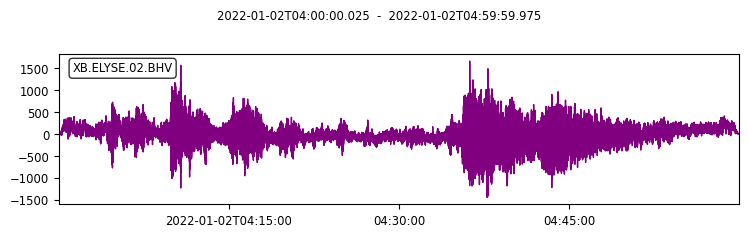

In [6]:
tr.plot(color='purple');

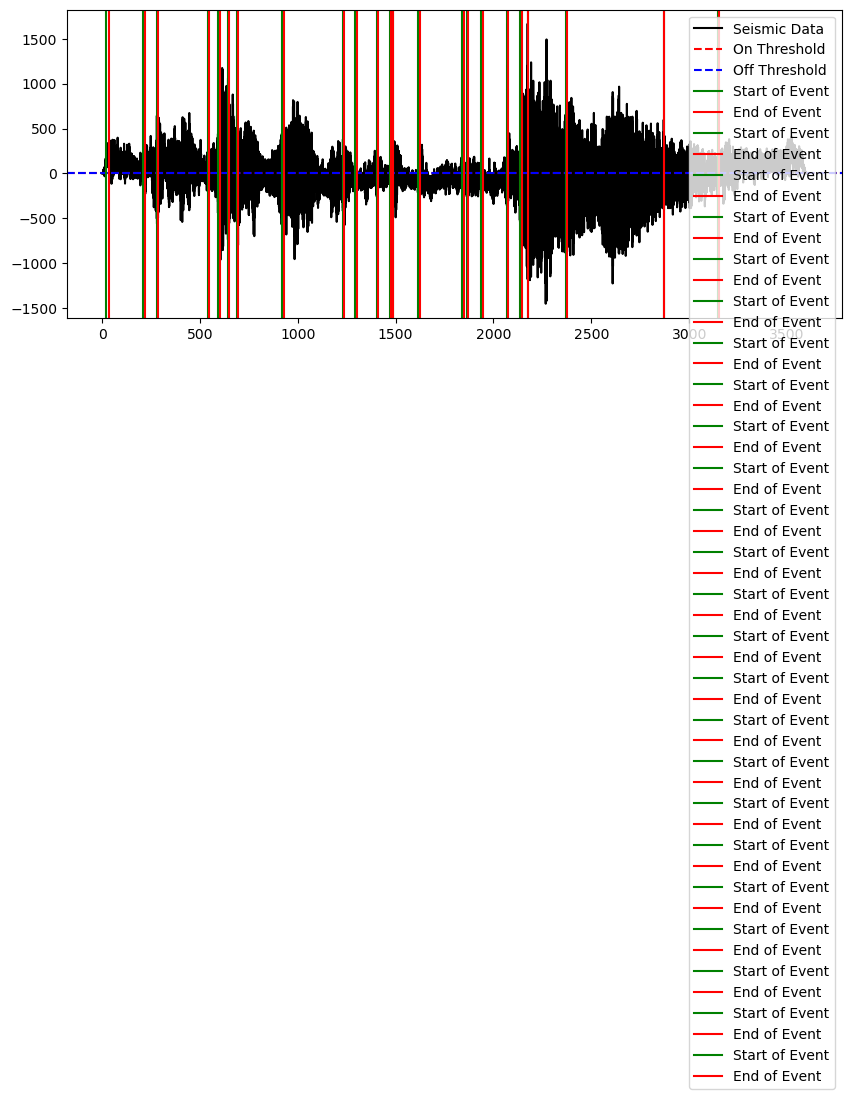

In [7]:
import obspy
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import matplotlib.pyplot as plt

# Step 1: Load seismic data (mseed format)
st = obspy.read(path+'XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed')  # Replace with the actual file path
tr = st[0]  # Use the first trace in the stream

# Step 2: Apply STA/LTA algorithm
# Set STA and LTA window lengths in samples (adjust depending on data sample rate)
nsta = int(1 * tr.stats.sampling_rate)  # 1 second STA window
nlta = int(20 * tr.stats.sampling_rate)  # 20 seconds LTA window
cft = classic_sta_lta(tr.data, nsta, nlta)

# Step 3: Detect triggers (start and end of events)
threshold_on = 3.5  # Adjust these thresholds based on data characteristics
threshold_off = 1.0
on_off = trigger_onset(cft, threshold_on, threshold_off)

# Step 4: Plot STA/LTA and detected events
plt.figure(figsize=(10, 4))
plt.plot(tr.times(), tr.data, 'k', label='Seismic Data')
plt.axhline(threshold_on, color='r', linestyle='--', label='On Threshold')
plt.axhline(threshold_off, color='b', linestyle='--', label='Off Threshold')
for event in on_off:
    plt.axvline(tr.times()[event[0]], color='g', label='Start of Event')
    plt.axvline(tr.times()[event[1]], color='r', label='End of Event')
plt.legend()
plt.show()

# `on_off` contains start and end points in samples


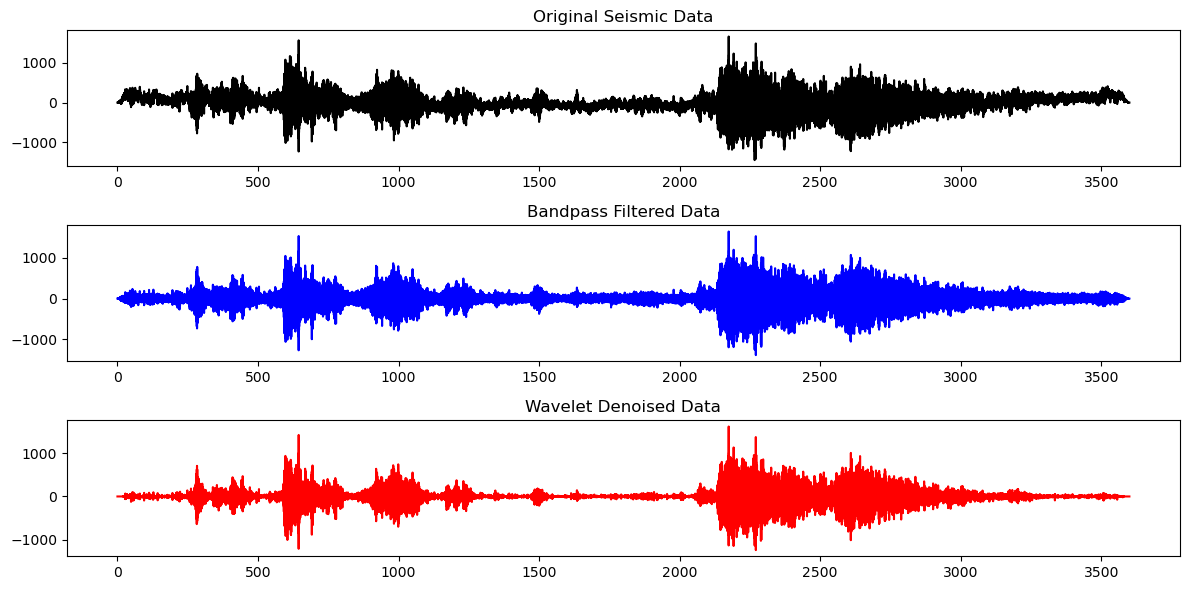

In [10]:
from obspy.signal.filter import bandpass
import numpy as np

# Step 1: Apply a bandpass filter
# Set the frequency range based on your data (e.g., 0.1 - 20 Hz for seismic signals)
filtered_data = bandpass(tr.data, freqmin=0.1, freqmax=20, df=tr.stats.sampling_rate, corners=4, zerophase=True)

# Step 2: (Optional) Apply wavelet denoising
# Here, I'll use PyWavelets for a basic wavelet denoising technique
import pywt

# Perform wavelet decomposition
coeffs = pywt.wavedec(filtered_data, 'db4', level=5)
# Thresholding to remove noise
thresholded_coeffs = [pywt.threshold(c, np.std(c)/2) for c in coeffs]
# Reconstruct the denoised signal
denoised_data = pywt.waverec(thresholded_coeffs, 'db4')

# Step 3: Plot the original, filtered, and denoised data
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(tr.times(), tr.data, 'k', label='Original Data')
plt.title('Original Seismic Data')

plt.subplot(312)
plt.plot(tr.times(), filtered_data, 'b', label='Filtered Data')
plt.title('Bandpass Filtered Data')

plt.subplot(313)
plt.plot(tr.times(), denoised_data, 'r', label='Denoised Data')
plt.title('Wavelet Denoised Data')
plt.tight_layout()
plt.show()


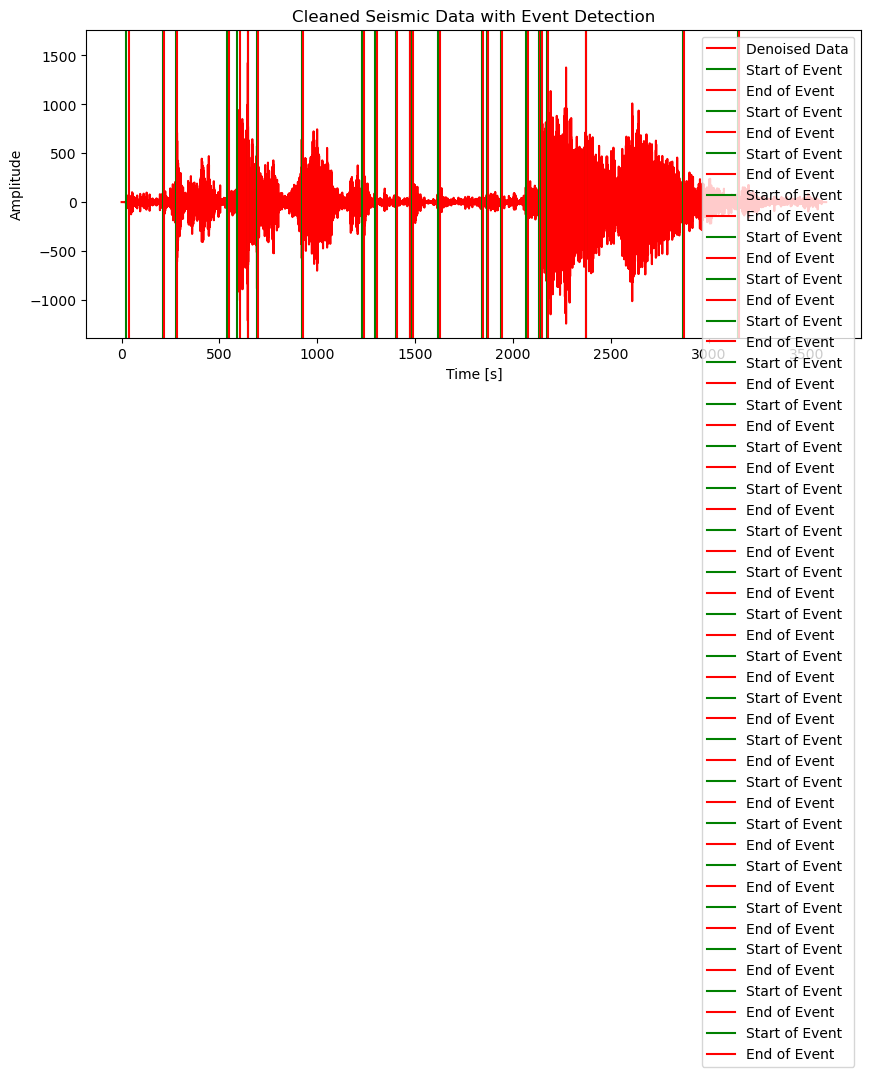

In [11]:
# Step 1: Plot the cleaned (denoised) seismic data with event markers
plt.figure(figsize=(10, 4))
plt.plot(tr.times(), denoised_data, 'r', label='Denoised Data')
for event in on_off:
    plt.axvline(tr.times()[event[0]], color='g', label='Start of Event')
    plt.axvline(tr.times()[event[1]], color='r', label='End of Event')
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Cleaned Seismic Data with Event Detection")
plt.show()


In [20]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [21]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [26]:
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

72060.0

In [27]:
row = cat.iloc[6]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1970, 6, 26, 20, 1)

In [28]:
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1970-06-26HR00_evid00009'

In [29]:
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-06-26T00:00:00.116000,0.000000,-6.727977e-16
1,1970-06-26T00:00:00.266943,0.150943,-8.646711e-16
2,1970-06-26T00:00:00.417887,0.301887,-9.298738e-16
3,1970-06-26T00:00:00.568830,0.452830,-8.589095e-16
4,1970-06-26T00:00:00.719774,0.603774,-7.139047e-16
...,...,...,...
572418,1970-06-27T00:00:02.832981,86402.716981,5.039820e-17
572419,1970-06-27T00:00:02.983925,86402.867925,-9.191068e-18
572420,1970-06-27T00:00:03.134868,86403.018868,-2.796955e-17
572421,1970-06-27T00:00:03.285811,86403.169811,-9.037156e-17


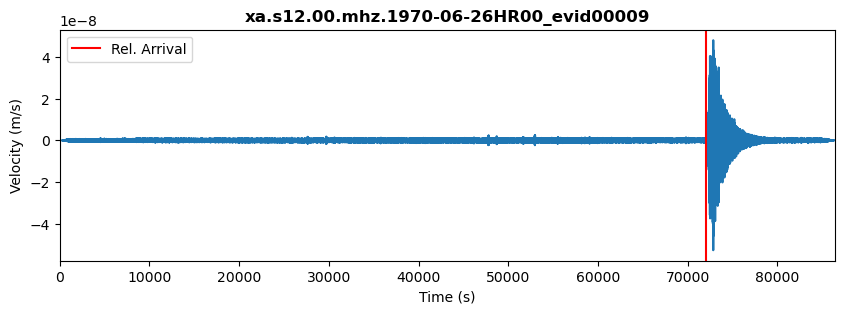

In [30]:
# Read in time steps and velocities
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace! 
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

In [32]:
import obspy
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import matplotlib.pyplot as plt
path2= 'data/lunar/training/data/S12_GradeA/'
# Step 1: Load seismic data (mseed format)
st = obspy.read(path2 + 'xa.s12.00.mhz.1970-04-25HR00_evid00006.csv')  # Replace with the actual file path
tr = st[0]  # Use the first trace in the stream

# Step 2: Apply STA/LTA algorithm
# Set STA and LTA window lengths in samples (adjust depending on data sample rate)
nsta = int(1 * tr.stats.sampling_rate)  # 1 second STA window
nlta = int(20 * tr.stats.sampling_rate)  # 20 seconds LTA window
cft = classic_sta_lta(tr.data, nsta, nlta)

# Step 3: Detect triggers (start and end of events)
threshold_on = 3.5  # Adjust these thresholds based on data characteristics
threshold_off = 1.0
on_off = trigger_onset(cft, threshold_on, threshold_off)

# Step 4: Plot STA/LTA and detected events
plt.figure(figsize=(10, 4))
plt.plot(tr.times(), tr.data, 'k', label='Seismic Data')
plt.axhline(threshold_on, color='r', linestyle='--', label='On Threshold')
plt.axhline(threshold_off, color='b', linestyle='--', label='Off Threshold')
for event in on_off:
    plt.axvline(tr.times()[event[0]], color='g', label='Start of Event')
    plt.axvline(tr.times()[event[1]], color='r', label='End of Event')
plt.legend()
plt.show()

TypeError: Unknown format for file data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-04-25HR00_evid00006.csv